## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

import keras
from keras.utils import Sequence
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential


2022-10-21 10:40:18.389881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### MNIST Dataset

In [16]:
mnist = tf.keras.datasets.mnist

### Divide into train and test data

In [17]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [18]:
x_train.shape

(60000, 28, 28)

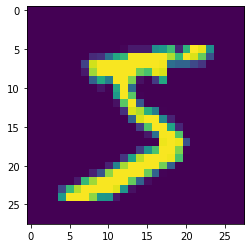

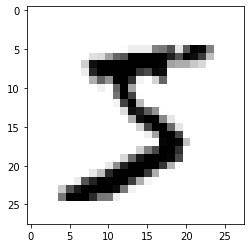

In [19]:
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap =plt.cm.binary)

In [20]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Pre-processing data

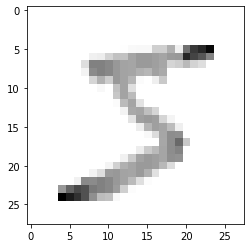

In [21]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [22]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
print(y_train[0])

5


In [24]:
img_size =28

x_train_ar = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_test_ar = np.array(x_test).reshape(-1, img_size, img_size, 1)

print(x_train_ar.shape)
print(x_test_ar.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Creating Deep Neural Network

In [25]:
model = Sequential()

# First Convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_train_ar.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

# Last fully connected layer 
model.add(Dense(10))
model.add(Activation('softmax'))

2022-10-20 00:41:04.667791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [29]:
print(len(x_train_ar))

60000


In [30]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [31]:
model.fit(x_train_ar, y_train, epochs=5, validation_split=0.3) #training

Epoch 1/5
1313/1313 [==============================] - 166s 125ms/step - loss: 0.3468 - accuracy: 0.8894 - val_loss: 0.1374 - val_accuracy: 0.9595
Epoch 2/5
1313/1313 [==============================] - 136s 104ms/step - loss: 0.1079 - accuracy: 0.9672 - val_loss: 0.0819 - val_accuracy: 0.9743
Epoch 3/5
1313/1313 [==============================] - 124s 94ms/step - loss: 0.0771 - accuracy: 0.9765 - val_loss: 0.0904 - val_accuracy: 0.9723
Epoch 4/5
1313/1313 [==============================] - 127s 97ms/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0636 - val_accuracy: 0.9812
Epoch 5/5
1313/1313 [==============================] - 129s 98ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0815 - val_accuracy: 0.9743


In [32]:
test_loss, test_acc = model.evaluate(x_test_ar, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0736 - accuracy: 0.9786
0.07364785671234131
0.978600025177002


In [33]:
predictions = model.predict([x_test_ar])
print(predictions)

313/313 [==============================] - 3s 9ms/step
[[5.3106048e-09 1.6971797e-04 3.5381336e-06 ... 9.9980944e-01
  2.0848925e-06 7.1078498e-06]
 [1.9719428e-06 5.0706717e-06 9.9998128e-01 ... 7.9842666e-06
  3.4339703e-06 8.9647978e-09]
 [1.5772377e-08 9.9998677e-01 2.4727811e-07 ... 6.2237937e-06
  1.0917614e-06 4.4926864e-08]
 ...
 [2.2915822e-08 1.2250847e-05 9.6189581e-09 ... 1.7859793e-05
  2.3332545e-06 9.6669370e-05]
 [1.8084719e-04 2.0554704e-07 1.5488163e-06 ... 1.1210931e-06
  1.2910239e-01 4.5819683e-03]
 [5.7689358e-06 4.7019768e-07 1.5595868e-05 ... 8.6601970e-10
  3.4312365e-05 7.1972539e-07]]


In [34]:
print(np.argmax(predictions[0]))

7


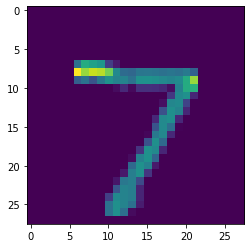

In [35]:
plt.imshow(x_test[0])

2


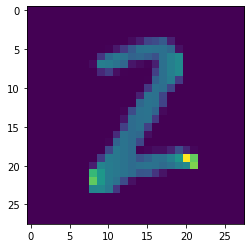

In [36]:
print(np.argmax(predictions[256]))
plt.imshow(x_test[256])

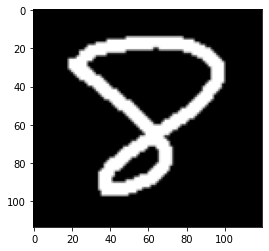

In [79]:
og = cv2.imread('8.png')
img = 255 - og
plt.imshow(img)

In [80]:
img.shape

(114, 120, 3)

In [81]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(114, 120)

In [82]:
resize = cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA)
resize.shape

(28, 28)

In [83]:
new_img = tf.keras.utils.normalize(resize, axis=1)
new_img = np.array(new_img).reshape(-1, img_size, img_size, 1)
new_img.shape

(1, 28, 28, 1)

In [84]:
pr = model.predict(new_img)
print(np.argmax(pr))

1/1 [==============================] - 0s 59ms/step
8
